# 多元线性回归

In [1]:
from numpy.linalg import inv
from numpy import dot, transpose

In [3]:
X = [[1, 6, 2], [1, 8, 1], [1, 10, 0], [1, 14, 2], [1, 18, 0]]
y = [[7], [9], [13], [17.5], [18]]

In [4]:
print(dot(inv(dot(transpose(X), X)), dot(transpose(X), y)))

[[1.1875    ]
 [1.01041667]
 [0.39583333]]


In [5]:
from numpy.linalg import lstsq

In [6]:
print(lstsq(X, y))

F:\LOVE_SPACE\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


(array([[1.1875    ],
       [1.01041667],
       [0.39583333]]), array([8.22916667]), 3, array([26.97402951,  2.46027806,  0.59056212]))


In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
X = [[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]]
y = [[7], [9], [13], [17.5], [18]]

In [9]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
X_test = [[8, 2], [9, 0], [11, 2], [16, 2], [12, 0]]
y_test = [[11], [8.5], [15], [18], [11]]

predictions = model.predict(X_test)

for i, p in enumerate(predictions):
    print('Predicted: %s, Target: %s' % (p, y_test[i]))
print('R-squared: %.2f' % model.score(X_test, y_test))

Predicted: [10.0625], Target: [11]
Predicted: [10.28125], Target: [8.5]
Predicted: [13.09375], Target: [15]
Predicted: [18.14583333], Target: [18]
Predicted: [13.3125], Target: [11]
R-squared: 0.77


## 多项式回归

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [14]:
X_train = [[6], [8], [10], [14], [18]]
y_train = [[7], [9], [13], [17.5], [18]]
X_test = [[6], [8], [11], [16]]
y_test = [[8], [12], [15], [18]]

In [25]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
xx = np.linspace(0, 26, 100)
yy = regressor.predict(xx.reshape(xx.shape[0], 1))


quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y_train)
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))



Simple linear regression r-squared 0.809726797707665
Quadratic regression r-squared 0.8675443656345073


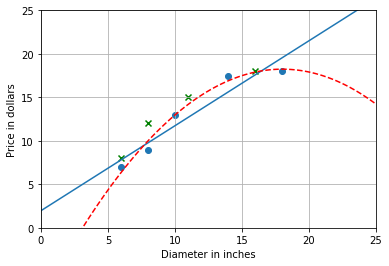

In [31]:
plt.plot(xx, yy)
plt.plot(xx, regressor_quadratic.predict(xx_quadratic), c='r', linestyle='--')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test, color='g', marker='x')
print('Simple linear regression r-squared', regressor.score(X_test, y_test))
print('Quadratic regression r-squared', regressor_quadratic.score(X_test_quadratic, y_test))